### Importing Necessary Libraries

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.under_sampling import RandomUnderSampler



### Loading Dataset

In [15]:
data = pd.read_csv('creditcard.csv')

### Split data into features and label (70% Training and 30% Testing)

In [16]:
X = data.drop('Class', axis=1)
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

train_counts = y_train.value_counts()
test_counts = y_test.value_counts()
# Print training data counts the default is 0 if 1 not found
print("\nTraining Data Counts:\nNon-fraud: {} \nFraud: \t{} \nTotal: \t{}".format(train_counts.get(0, 0), train_counts.get(1, 0), len(y_train)))

# Print test data counts same method
print("\nTest Data Counts:\nNon-fraud: {} \nFraud: \t{} \nTotal: \t{}".format(test_counts.get(0, 0), test_counts.get(1, 0), len(y_test)))


Training Data Counts:
Non-fraud: 199020 
Fraud: 	344 
Total: 	199364

Test Data Counts:
Non-fraud: 85295 
Fraud: 	148 
Total: 	85443


### Rasampling Ratios and Applying All three models LR, NB and KNN as done in Research paper


Resampling ratio: A (50:50)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression results for A (50:50):
Sensitivity: 0.872
Specificity: 0.968
Accuracy: 0.968
Precision: 0.045
F-Measure: 0.086
AUC: 0.952

Naive Bayes results for A (50:50):
Sensitivity: 0.709
Specificity: 0.987
Accuracy: 0.986
Precision: 0.084
F-Measure: 0.150
AUC: 0.961

K-Nearest Neighbors results for A (50:50):
Sensitivity: 0.635
Specificity: 0.654
Accuracy: 0.653
Precision: 0.003
F-Measure: 0.006
AUC: 0.687

Resampling ratio: B (34:66)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression results for B (34:66):
Sensitivity: 0.858
Specificity: 0.981
Accuracy: 0.981
Precision: 0.073
F-Measure: 0.134
AUC: 0.946

Naive Bayes results for B (34:66):
Sensitivity: 0.689
Specificity: 0.987
Accuracy: 0.987
Precision: 0.084
F-Measure: 0.150
AUC: 0.961

K-Nearest Neighbors results for B (34:66):
Sensitivity: 0.412
Specificity: 0.850
Accuracy: 0.849
Precision: 0.005
F-Measure: 0.009
AUC: 0.674

Resampling ratio: C (25:75)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression results for C (25:75):
Sensitivity: 0.858
Specificity: 0.985
Accuracy: 0.985
Precision: 0.091
F-Measure: 0.165
AUC: 0.944

Naive Bayes results for C (25:75):
Sensitivity: 0.676
Specificity: 0.990
Accuracy: 0.989
Precision: 0.104
F-Measure: 0.181
AUC: 0.960

K-Nearest Neighbors results for C (25:75):
Sensitivity: 0.345
Specificity: 0.899
Accuracy: 0.898
Precision: 0.006
F-Measure: 0.012
AUC: 0.682


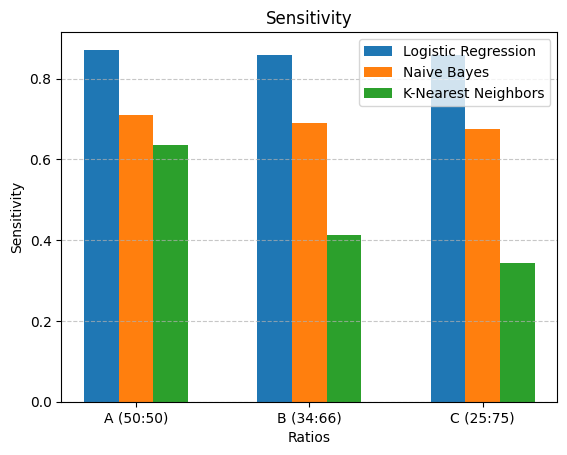

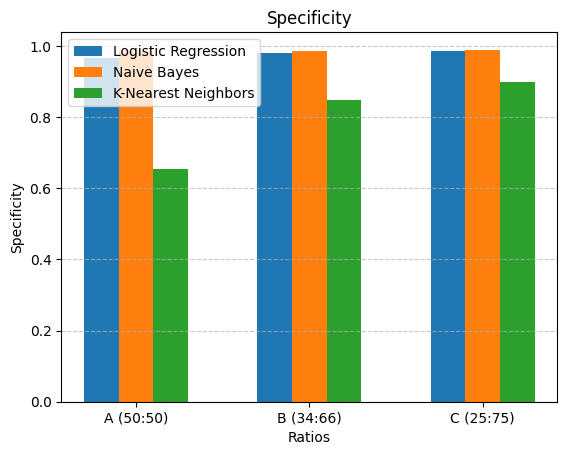

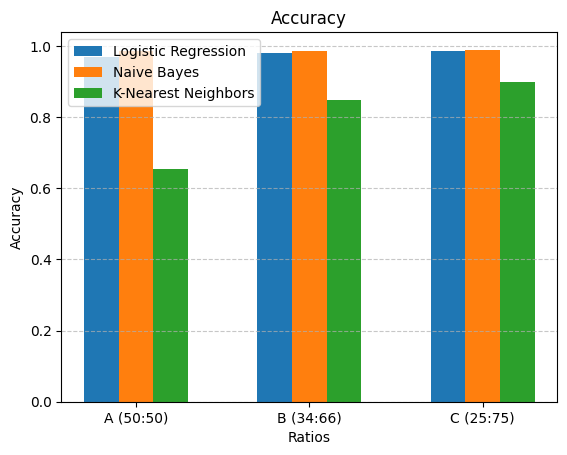

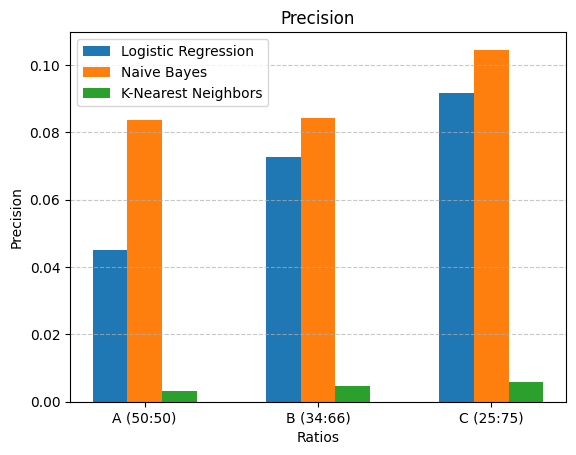

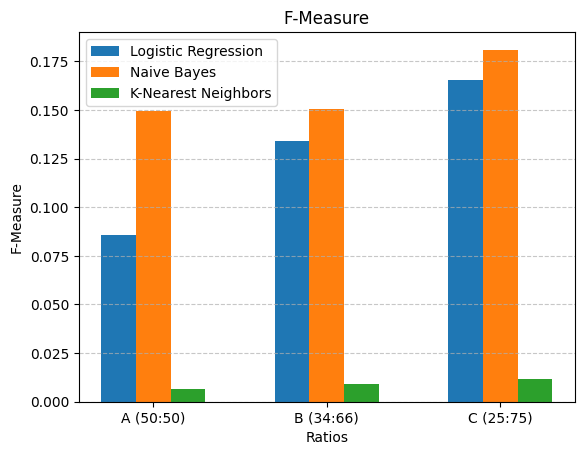

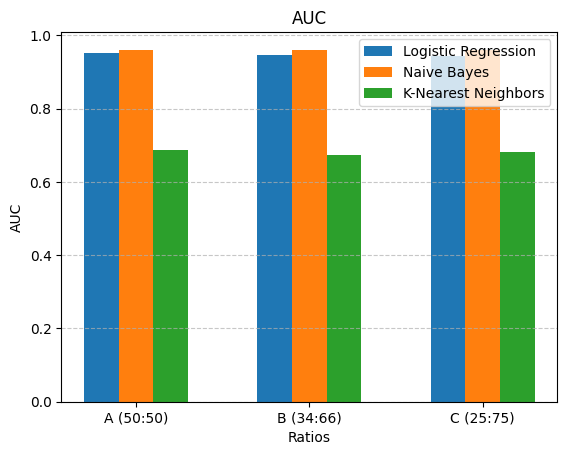

In [17]:
# O for Non Fruad and 1 for Fruad
ratios = {
    'A (50:50)': {0: 344, 1: 344},
    'B (34:66)': {0: 692, 1: 341},
    'C (25:75)': {0: 1024, 1: 344}
}

models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5)
}

# store results of each model
metrics_results = {ratio: {model: {} for model in models.keys()} for ratio in ratios.keys()}

def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    report = classification_report(y, y_pred, output_dict=True, zero_division=0)
    auc = roc_auc_score(y, model.predict_proba(X)[:,1])
    return {
        'Sensitivity': report['1']['recall'],
        'Specificity': report['0']['recall'],
        'Accuracy': report['accuracy'],
        'Precision': report['1']['precision'],
        'F-Measure': report['1']['f1-score'],
        'AUC': auc
    }


for ratio_name, sampling_strategy in ratios.items():
    print(f"\nResampling ratio: {ratio_name}")
    rus = RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=42)
    X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

    for model_name, model in models.items():
        model.fit(X_resampled, y_resampled)
        metrics = evaluate_model(model, X_test, y_test)
        metrics_results[ratio_name][model_name] = metrics

        # Print the metrics for each model and ratio
        print(f"\n{model_name} results for {ratio_name}:")
        for metric, value in metrics.items():
            print(f"{metric}: {value:.3f}")


def plot_metrics(metrics_results, metric_name):
    labels = list(ratios.keys())
    metrics = {
        'Logistic Regression': [metrics_results[ratio]['Logistic Regression'][metric_name] for ratio in ratios.keys()],
        'Naive Bayes': [metrics_results[ratio]['Naive Bayes'][metric_name] for ratio in ratios.keys()],
        'K-Nearest Neighbors': [metrics_results[ratio]['K-Nearest Neighbors'][metric_name] for ratio in ratios.keys()]
    }

    x = np.arange(len(labels))
    width = 0.2

    fig, ax = plt.subplots()
    ax.bar(x - width, metrics['Logistic Regression'], width, label='Logistic Regression')
    ax.bar(x, metrics['Naive Bayes'], width, label='Naive Bayes')
    ax.bar(x + width, metrics['K-Nearest Neighbors'], width, label='K-Nearest Neighbors')


    ax.set_xlabel('Ratios')
    ax.set_ylabel(metric_name)
    ax.set_title(f'{metric_name}')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.grid(axis='y', linestyle='--', alpha=0.7, zorder=0)
    ax.legend()

    plt.show()

# Plot chart
plot_metrics(metrics_results, 'Sensitivity')
plot_metrics(metrics_results, 'Specificity')
plot_metrics(metrics_results, 'Accuracy')
plot_metrics(metrics_results, 'Precision')
plot_metrics(metrics_results, 'F-Measure')
plot_metrics(metrics_results, 'AUC')
